Lasso method to determine multi-factor coefficients

In [107]:
import pandas as pd
import numpy as np
from sklearn import linear_model

def normalization(series):
    return (series - min(series))/(max(series) - min(series)) 

df = pd.read_csv("data_new.csv")
del df['Unnamed: 0']
df = df.dropna()

df['Gain'] = 100*normalization(df['Gain'])  
# Multiplied by 100 is convenient for observing the regression coefficient, 
# otherwise the coefficient is too small.

df['PE'] = normalization(df['PE'])
df['LFLO'] = normalization(df['LFLO'])
df['NetProfitGrowRate'] = normalization(df['NetProfitGrowRate'])
df['MoneyFlow20'] = normalization(df['MoneyFlow20'])
df['PB'] = normalization(df['PB'])
df['AccountsPayablesTRate'] = normalization(df['AccountsPayablesTRate'])
df['ROE'] = normalization(df['ROE'])
df['FiftyTwoWeekHigh'] = normalization(df['FiftyTwoWeekHigh'])
variables=['PE','LFLO','NetProfitGrowRate','AccountsPayablesTRate','ROE','MoneyFlow20','PB','FiftyTwoWeekHigh']

In [108]:
# Turn the data into a matrix
rawmat = np.mat(df)
mat = rawmat[:,2:10]
y = rawmat[:,10]
print (mat.shape,y.shape)

# Data set division
trainMat = mat[0:4000] 
testMat = mat[4000:]
trainY = y[0:4000]
testY = y[4000:]

(5402, 8) (5402, 1)


In [109]:
# Use the Lasso model to find the explanatory strength of each factor for return
clf2 = linear_model.Lasso(alpha=0.0075)
clf2.fit(trainMat,trainY)
weights_lasso = clf2.coef_
weights_lasso
for i in range(8):
    print(variables[i],":",weights_lasso[i])

PE : 0.0
LFLO : -0.0
NetProfitGrowRate : -0.0
AccountsPayablesTRate : -0.0
ROE : -0.0
MoneyFlow20 : -0.0
PB : 0.08976530459340512
FiftyTwoWeekHigh : 0.18596685879474992


In [110]:
temp=df[4000:]
score_book = {}
# Regression coefficients
weights = weights_lasso
# Calculate the score
for i in range(len(temp)):
    secID = temp['secID'][i:i+1].values[0]
    x = rawmat[i,2:10]
    score = (np.array(np.dot(x,weights)))
    score_book.update({secID:score[0][0]}) 
# Select the top 10 stocks and determine the buying weight based on the score value
top10 = sorted(score_book.items(), key = lambda x:x[1],reverse=True)[:10]

In [111]:
slec_stk = []
temp_w = []
w = {}  # Store the weight of the number of stocks purchased
for i in range(len(top10)):
    slec_stk.append(top10[i][0])
    temp_w.append(top10[i][1])
temp_w = temp_w/(np.array(temp_w).sum())
for i in range(len(temp_w)):
    w.update({slec_stk[i]:temp_w[i]})
print(w)

{'600208.XSHG': 0.11403538088527025, '600028.XSHG': 0.10348904119295628, '603833.XSHG': 0.10331056575876063, '601766.XSHG': 0.09924449276070188, '002001.XSHE': 0.0985411252597001, '600498.XSHG': 0.09783366396316394, '002202.XSHE': 0.09720747651116149, '600584.XSHG': 0.09600912069957088, '000703.XSHE': 0.0953024924842383, '600297.XSHG': 0.09502664048447615}


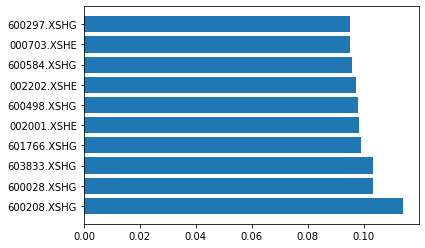

In [112]:
import matplotlib.pyplot as plt
w1 = sorted(w.items(),key = lambda item:item[1],reverse=True)
x = []
y = []
for d in w1:
    x.append(d[0])
    y.append(d[1])
plt.barh(x[0:10], y[0:10])
plt.show()
